In [1]:
import numpy as np
import pandas as pd
import scipy
import datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Load data

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col='Unnamed: 0')

In [3]:
# set year, month, quarter columns
df['year'] = df['time'].apply(lambda x: x[:4])
df['month'] = df['time'].apply(lambda x:x[5:7])
df['quarter'] = df['month'].apply(lambda x: (int(x)-1)//3+1)

In [4]:
# drop 2018 films 
df = df[~(df['year']=='2018')]

# Basic Analysis

## Great films & Box office over year

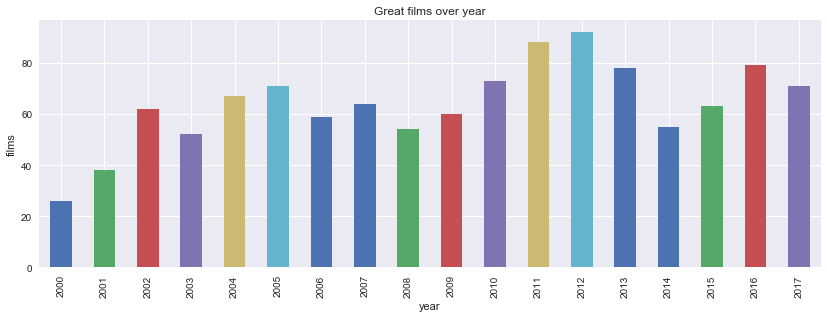

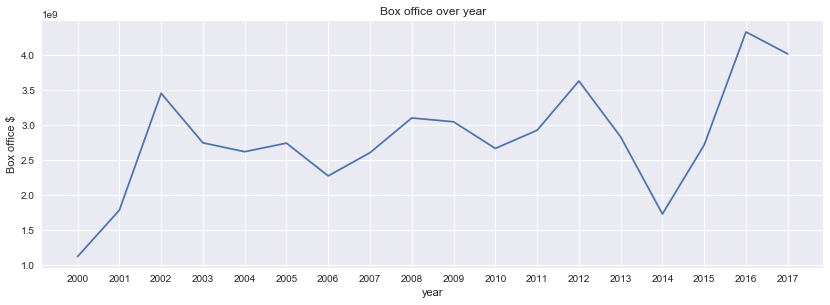

In [5]:
plt.style.use('seaborn')

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
df.groupby(df['year']).size().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('films')
plt.title('Great films over year')
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(2,1,2)
plt.plot(df[['year','box_office']].groupby('year').sum())
plt.xlabel('year')
plt.ylabel('Box office $')
plt.title('Box office over year')
plt.show()

## genre trend of great movies

### genre data processing

In [6]:
def get_columns(df_column):
    l = []
    for ele in df_column:
        if ele!='na' and ele!='nan':
            l.extend(ele.split(', '))

    return set([x[1:-1] for x in l])

genre_list = get_columns(df['genre'])
for ele in genre_list:
    df['genre_'+str(ele)]=np.where(df["genre"].str.contains(ele),1,0)

df['genre_Total'] = df['genre'].apply(lambda x: len(x.split(', ')))

### genre wordcloud

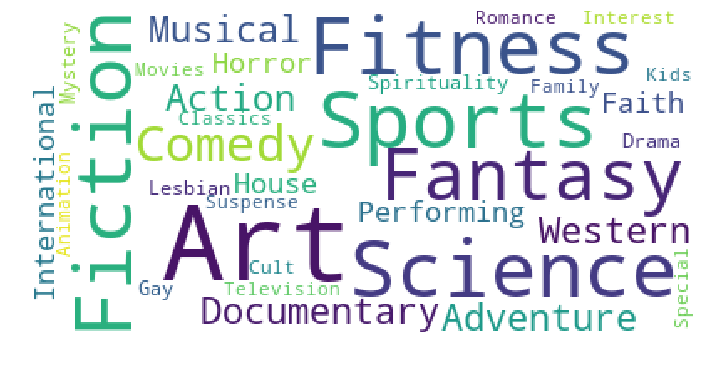

In [7]:
string = ' '.join(genre_list)
words=nltk.tokenize.word_tokenize(string)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white').generate(' '.join(words))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Genre and box office distribution

In [8]:
genre_list = [str('genre_'+x) for x in genre_list]

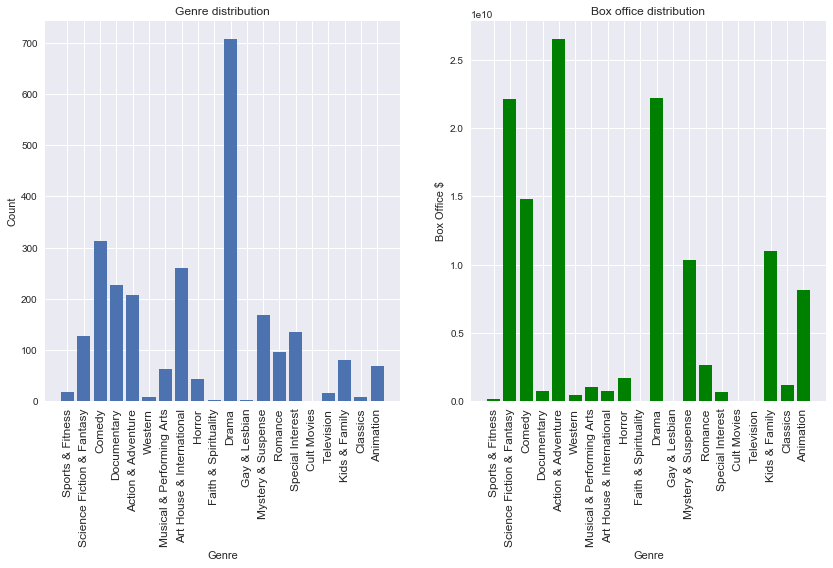

In [9]:
genre_count = {}
box_office = {}

for genre in genre_list:
    genre_count[genre[6:]] = len(df[df[genre]==1])
    box_office[genre[6:]] = sum(df[df[genre]==1]['box_office'])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(genre_count.keys(),genre_count.values())
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre distribution')
plt.xticks(rotation=90,fontsize=12)

plt.subplot(1,2,2)
plt.bar(box_office.keys(),box_office.values(),color='G')
plt.xlabel('Genre')
plt.ylabel('Box Office $')
plt.title('Box office distribution')
plt.xticks(rotation=90,fontsize=12)

plt.show()

### genre trend over year

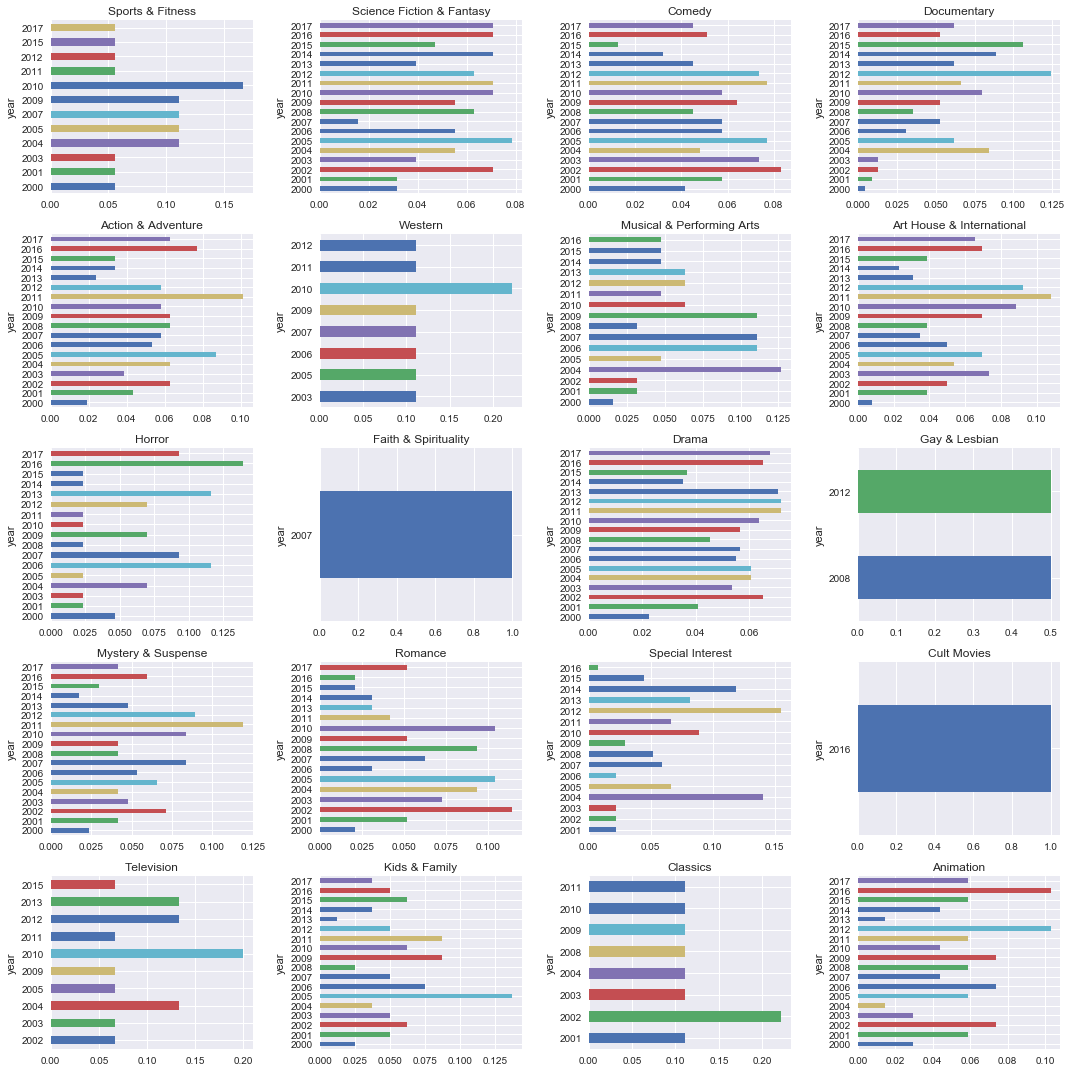

In [10]:
from matplotlib.ticker import FuncFormatter
COL_NUM = 4
ROW_NUM = 5
fig,axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i, ele in enumerate(genre_list):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    ele_trend_ratio = df[df[ele]==1].groupby(df['year']).size() / len(df[df[ele]==1])
    ele_trend_ratio.plot(kind='barh',ax=ax)
    ax.set_title(ele[6:])

plt.tight_layout() 

### genre trend over quarter

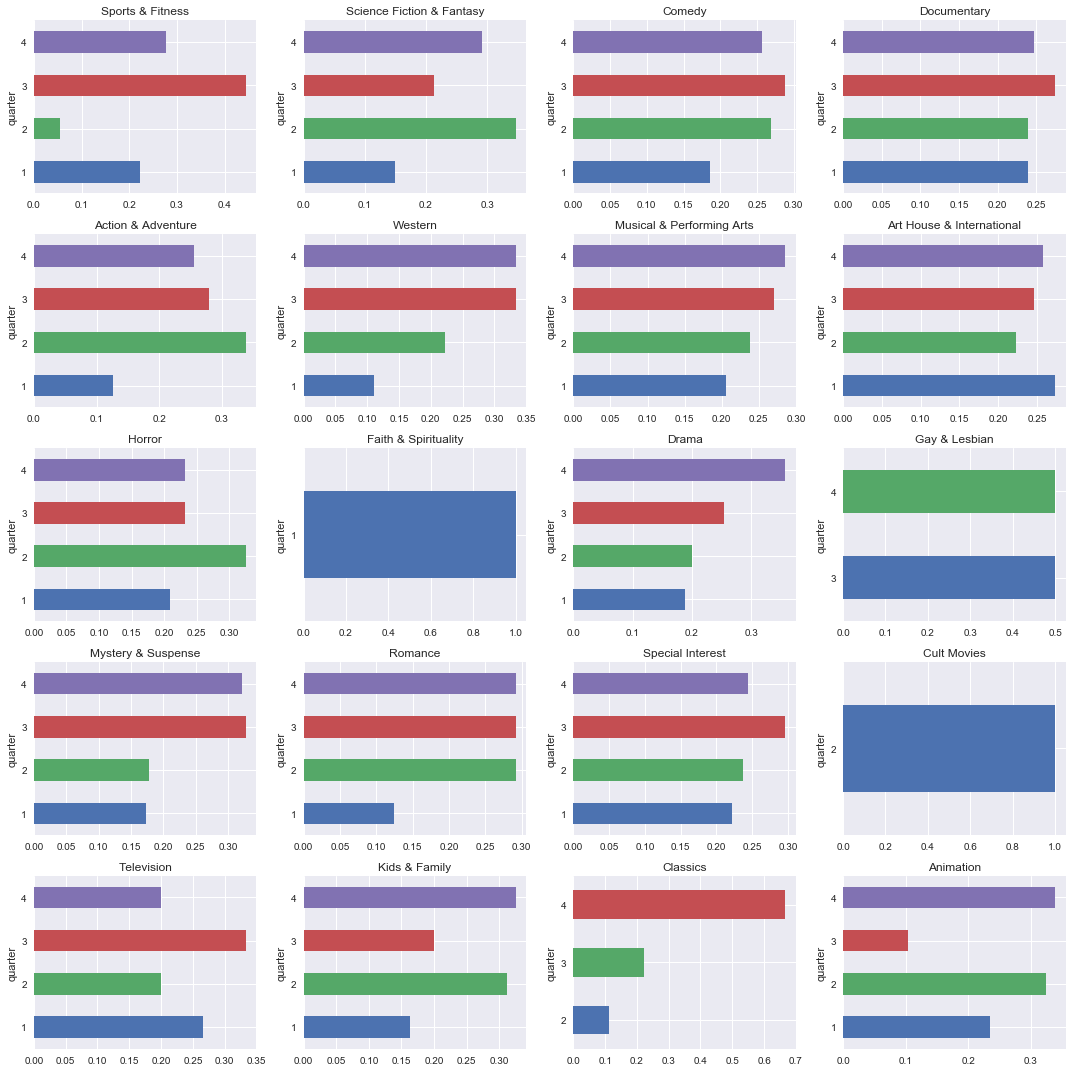

In [11]:
from matplotlib.ticker import FuncFormatter
COL_NUM = 4
ROW_NUM = 5
fig,axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15))

for i, ele in enumerate(genre_list):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    ele_trend_ratio = df[df[ele]==1].groupby(df['quarter']).size() / len(df[df[ele]==1])
    ele_trend_ratio.plot(kind='barh',ax=ax)
    ax.set_title(ele[6:])

plt.tight_layout() 

## Rating distribution

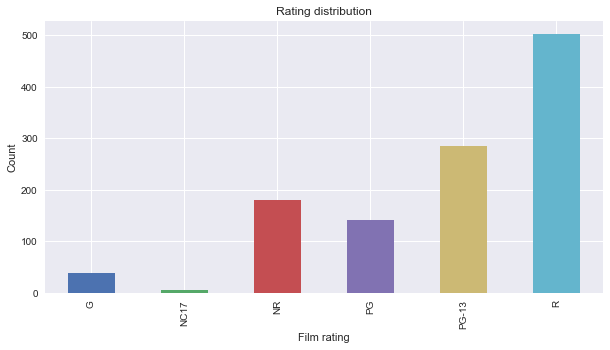

In [12]:
plt.figure(figsize=(10,5))
df.groupby(['rating']).size().plot(kind='bar')
plt.xlabel('Film rating')
plt.ylabel('Count')
plt.title('Rating distribution')
plt.show()

## Director explorations

### Director data processing

In [13]:
dic = {}
for directors in df['director']:
    director_list = directors.split(', ')
    for director in director_list:
        dic[director] = dic.get(director,0)+1
dic = sorted(dic.items(),key=lambda x:x[1],reverse=True)

top_director = [x for x in dic if x[1]>=7]
print('Top Directors: ',top_director, '\n')
director_name = top_director[0][0][1:-1]
print('Number One Director: ',director_name)

Top Directors:  [("'Joel Coen'", 10), ("'Steven Soderbergh'", 8), ("'Christopher Nolan'", 7), ("'Jon Favreau'", 7), ("'Werner Herzog'", 7)] 

Number One Director:  Joel Coen


### Brief look at top directors' preference on genre

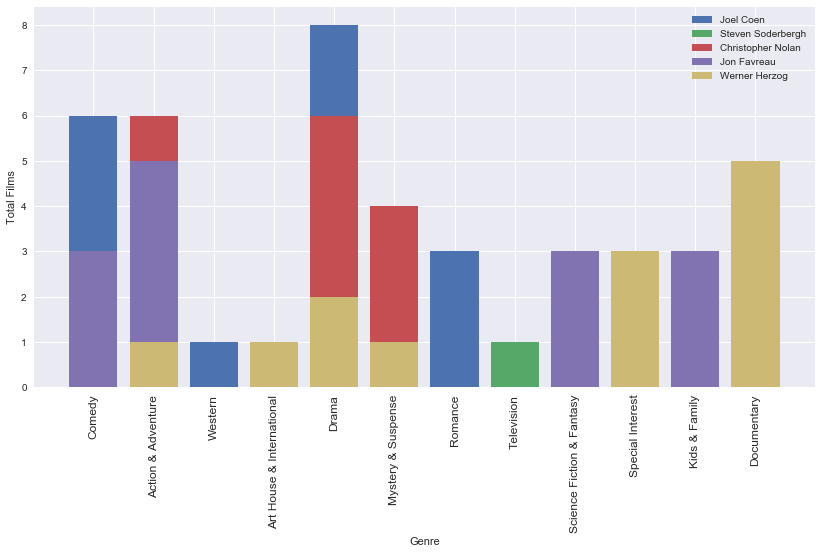

In [14]:
plt.figure(figsize=(14,7))
for director in top_director:
    sub_df = df[[director[0] in directors for directors in [ele.split(', ') for ele in df['director']]]]
    record = {}
    for genre in genre_list:
        count = sum(sub_df[genre_list][genre])
        if count>0:
            record[genre[6:]]=count
    plt.bar(record.keys(),record.values(),label=director[0][1:-1])

plt.legend(loc='upper right')
plt.xlabel('Genre')
plt.ylabel('Total Films')
plt.xticks(rotation=90,fontsize=12)
plt.show()

### Look closer into director 'Joel Choen'

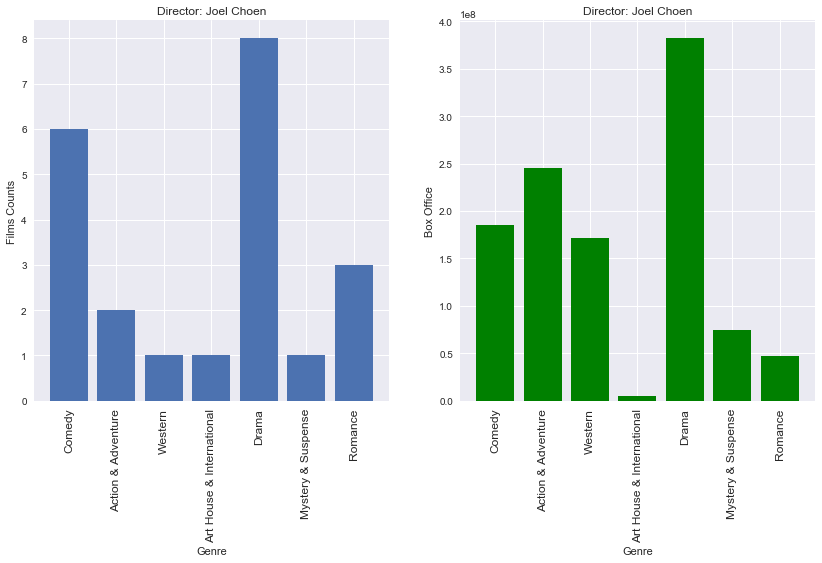

In [15]:
df_JC = df[["'Joel Coen'" in directors for directors in [ele.split(', ') for ele in df['director']]]]

record = {}
box_office = {}
for genre in genre_list:
    count = sum(df_JC[genre_list][genre])
    if count>0:
        record[genre[6:]] = count
        box_office[genre[6:]] = sum(df_JC[df_JC[genre]==1]['box_office'])

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.bar(record.keys(),record.values())
plt.xlabel('Genre')
plt.ylabel('Films Counts')
plt.title('Director: Joel Choen')
plt.xticks(rotation=90,fontsize=12)

plt.subplot(1,2,2)
plt.bar(box_office.keys(),box_office.values(),color='G')
plt.xlabel('Genre')
plt.ylabel('Box Office')
plt.title('Director: Joel Choen')
plt.xticks(rotation=90,fontsize=12)

plt.show()